<a href="https://colab.research.google.com/github/UrviSoni/pytorch_deeplearning/blob/master/Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5)),])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Processing...
Done!


In [0]:
# Defining network architechture
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    
  def forward(self, x):
    # make sure input tensor is flattened
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim = 1)
    
    return x

In [12]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


Epoch: 1/30..  Training Loss: 0.505..  Test Loss: 0.436..  Test Accuracy: 0.841
Epoch: 2/30..  Training Loss: 0.389..  Test Loss: 0.416..  Test Accuracy: 0.848
Epoch: 3/30..  Training Loss: 0.359..  Test Loss: 0.389..  Test Accuracy: 0.857
Epoch: 4/30..  Training Loss: 0.334..  Test Loss: 0.378..  Test Accuracy: 0.866
Epoch: 5/30..  Training Loss: 0.317..  Test Loss: 0.374..  Test Accuracy: 0.871
Epoch: 6/30..  Training Loss: 0.304..  Test Loss: 0.363..  Test Accuracy: 0.870
Epoch: 7/30..  Training Loss: 0.289..  Test Loss: 0.407..  Test Accuracy: 0.859
Epoch: 8/30..  Training Loss: 0.281..  Test Loss: 0.400..  Test Accuracy: 0.861
Epoch: 9/30..  Training Loss: 0.274..  Test Loss: 0.370..  Test Accuracy: 0.874
Epoch: 10/30..  Training Loss: 0.265..  Test Loss: 0.365..  Test Accuracy: 0.873
Epoch: 11/30..  Training Loss: 0.259..  Test Loss: 0.382..  Test Accuracy: 0.875
Epoch: 12/30..  Training Loss: 0.254..  Test Loss: 0.376..  Test Accuracy: 0.872
Epoch: 13/30..  Training Loss: 0.247.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt


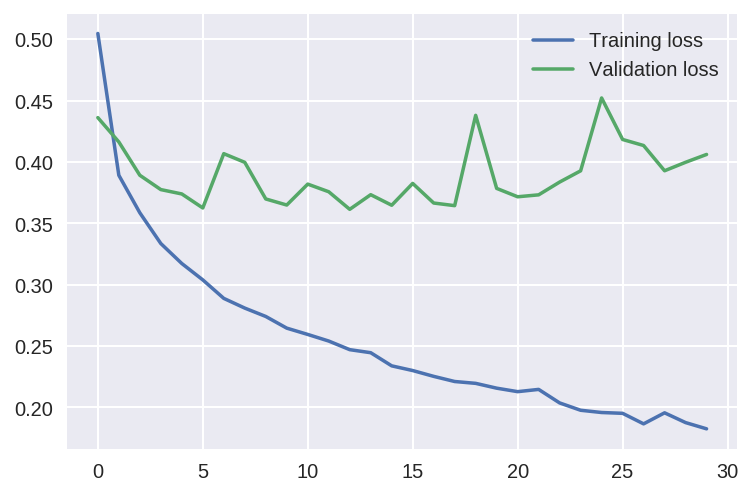

In [14]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
